In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import analytics_core_V04 as ac
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

from typing import List, Dict, Tuple
import pandas as pd
import matplotlib.pyplot as plt
import helper_functions as cf

# Figure 4B

In [2]:
fin = [[2071, 1597, 1827, 1527],[3011, 2976, 3405, 3030]]
labels = ['InSol','SPEC']
colors = ['#623a73', '#ff0000']  

# Calculate medians for bars
medians = [np.median(reps) for reps in fin]

# Create strip data for points
strip_data = []
for i, (label, reps) in enumerate(zip(labels, fin)):
    for rep_val in reps:
        strip_data.append({'Category': label, 'Value': rep_val})

strip_df = pd.DataFrame(strip_data)

# Create strip plot
fig = px.strip(strip_df, x='Category', y='Value', 
               category_orders={'Category': labels})

# Update strip plot traces (points)
fig.update_traces(
    jitter=0.8,  # Adjust this value (0-1)
    marker=dict(size=18, color='black', line=dict(width=0.5, color='white'))
)

# Add bars for each category
for i, (label, median, color) in enumerate(zip(labels, medians, colors)):
    fig.add_trace(go.Bar(
        x=[label],
        y=[median],
        width=0.5,
        marker=dict(color=color, line=dict(width=1, color='black')),
        name=label,
        showlegend=False
    ))

fig.update_layout(
    width=600,
    height=600,
    template='plotly_white',
    xaxis_title='',
    yaxis_title='Glycosites Identified',
    yaxis=dict(range=[0, 3600]),
    showlegend=False
)
#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure_4b.pdf', width=600, height=600)

# Figure 4C

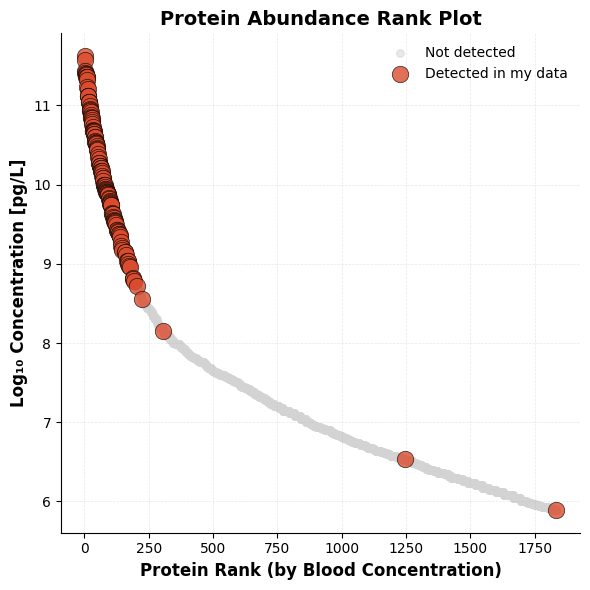

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

tsv_file = r'Z:\SPEC\submission\raw\figure4\proteinatlas.tsv'
csv_file = r'Z:\SPEC\submission\raw\figure4\glycan.proteins_SPEC.csv'
df_reference = pd.read_csv(tsv_file, sep='\t')
df_mydata = pd.read_csv(csv_file)
# Extract Uniprot ID from Accession column (take the part before '|')
df_mydata['Uniprot_ID'] = df_mydata['Accession'].str.split('|').str[0]
# Get set of Uniprot IDs from your data
my_proteins = set(df_mydata['Uniprot_ID'])
# Prepare reference data
concentration_col = 'Blood concentration - Conc. blood MS [pg/L]'
# Remove rows with missing or invalid concentrations
df_reference = df_reference.dropna(subset=[concentration_col, 'Uniprot'])
df_reference[concentration_col] = pd.to_numeric(df_reference[concentration_col], errors='coerce')
df_reference = df_reference.dropna(subset=[concentration_col])
# Filter out zero or negative concentrations for log transform
df_reference = df_reference[df_reference[concentration_col] > 0]
# Log10 transform concentration
df_reference['log_concentration'] = np.log10(df_reference[concentration_col])
# Sort by concentration (descending) and create rank
df_reference = df_reference.sort_values('log_concentration', ascending=False).reset_index(drop=True)
df_reference['rank'] = df_reference.index + 1
# Check if protein is in your data
df_reference['in_mydata'] = df_reference['Uniprot'].isin(my_proteins)
# Find the highest rank where you still have a match
max_rank = df_reference[df_reference['in_mydata']]['rank'].max()
# Filter to only show up to max_rank
df_plot = df_reference[df_reference['rank'] <= max_rank].copy()
# Create the plot
fig, ax = plt.subplots(figsize=(6, 6))
# Plot all proteins (not in your data)
ax.scatter(df_plot[~df_plot['in_mydata']]['rank'],
           df_plot[~df_plot['in_mydata']]['log_concentration'],
           color='lightgray',
           s=30,
           alpha=0.5,
           label='Not detected')
# Highlight proteins in your data
ax.scatter(df_plot[df_plot['in_mydata']]['rank'],
           df_plot[df_plot['in_mydata']]['log_concentration'],
           color='#db4c2e',
           s=140,
           alpha=0.8,
           edgecolors='black',
           linewidth=0.5,
           label='Detected in my data',
           zorder=3)
# Formatting
ax.set_xlabel('Protein Rank (by Blood Concentration)', fontsize=12, fontweight='bold')
ax.set_ylabel('Log₁₀ Concentration [pg/L]', fontsize=12, fontweight='bold')
ax.set_title('Protein Abundance Rank Plot', fontsize=14, fontweight='bold')
ax.legend(frameon=False, fontsize=10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha=0.3, linestyle='--', linewidth=0.5)
plt.tight_layout()
# Save figure
#fig.savefig(r'D:\Projects\SPEC\figs_raw\Figure_4m.pdf', dpi=300, bbox_inches='tight')
plt.show()


# Figure 4D

In [5]:
df_insol = pd.read_csv(r'Z:\SPEC\submission\raw\figure4\diGly_sol_new.csv').drop('Unnamed: 0',axis = 1)
df_spec = pd.read_csv(r'Z:\SPEC\submission\raw\figure4\diGly_SPEC_new.csv').drop('Unnamed: 0',axis = 1)

nums_insol = []
nums_spec = []
for i, col in enumerate(df_insol.iloc[:,:3].columns):
    nums_insol.append(len(df_insol[col].dropna()))
    nums_spec.append(len(df_spec.iloc[:,i].dropna()))
fin = [nums_insol,nums_spec]
labels = ['InSol','SPEC']
colors = ['#623a73', '#ff0000']  


medians = [np.median(reps) for reps in fin]


strip_data = []
for i, (label, reps) in enumerate(zip(labels, fin)):
    for rep_val in reps:
        strip_data.append({'Category': label, 'Value': rep_val})

strip_df = pd.DataFrame(strip_data)


fig = px.strip(strip_df, x='Category', y='Value', 
               category_orders={'Category': labels})


fig.update_traces(
    jitter=0.8,  
    marker=dict(size=18, color='black', line=dict(width=0.5, color='white'))
)


for i, (label, median, color) in enumerate(zip(labels, medians, colors)):
    fig.add_trace(go.Bar(
        x=[label],
        y=[median],
        width=0.5,
        marker=dict(color=color, line=dict(width=1, color='black')),
        name=label,
        showlegend=False
    ))

fig.update_layout(
    width=600,
    height=600,
    template='plotly_white',
    xaxis_title='',
    yaxis_title='KGG sites Identified',
    yaxis=dict(range=[0, 6500]),
    showlegend=False
)
fig.write_image(r'Z:\SPEC\submission\plots\Figure_4d.pdf', width=600, height=600)

# Figure 4F

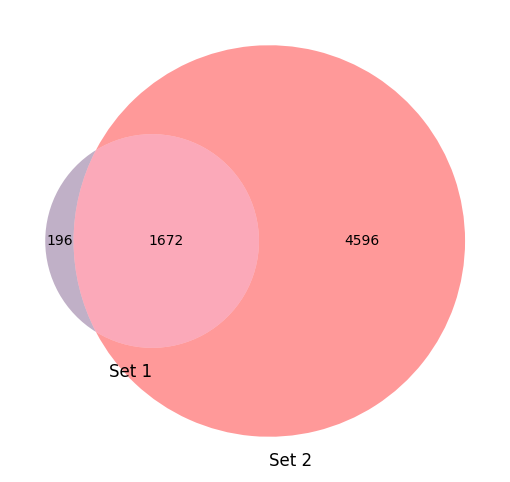

In [9]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


set1 = set(df_insol['PTM_Collapse_key'])
set2 = set(df_spec['PTM_Collapse_key'])

plt.figure(figsize=(8, 6))
venn2([set1, set2], set_labels=('Set 1', 'Set 2'), set_colors=('#623a73', '#ff0000'))

plt.savefig(r'Z:\SPEC\submission\plots\Figure_4e.pdf', dpi=300, bbox_inches='tight')

# Figure 4G


Shared between WF1 & WF2: 707
Unique to Workflow 2: 1144
Total in WF2: 1851

Performing GO enrichment...

Significant GO terms (shared genes): 386
Significant GO terms (unique genes): 262


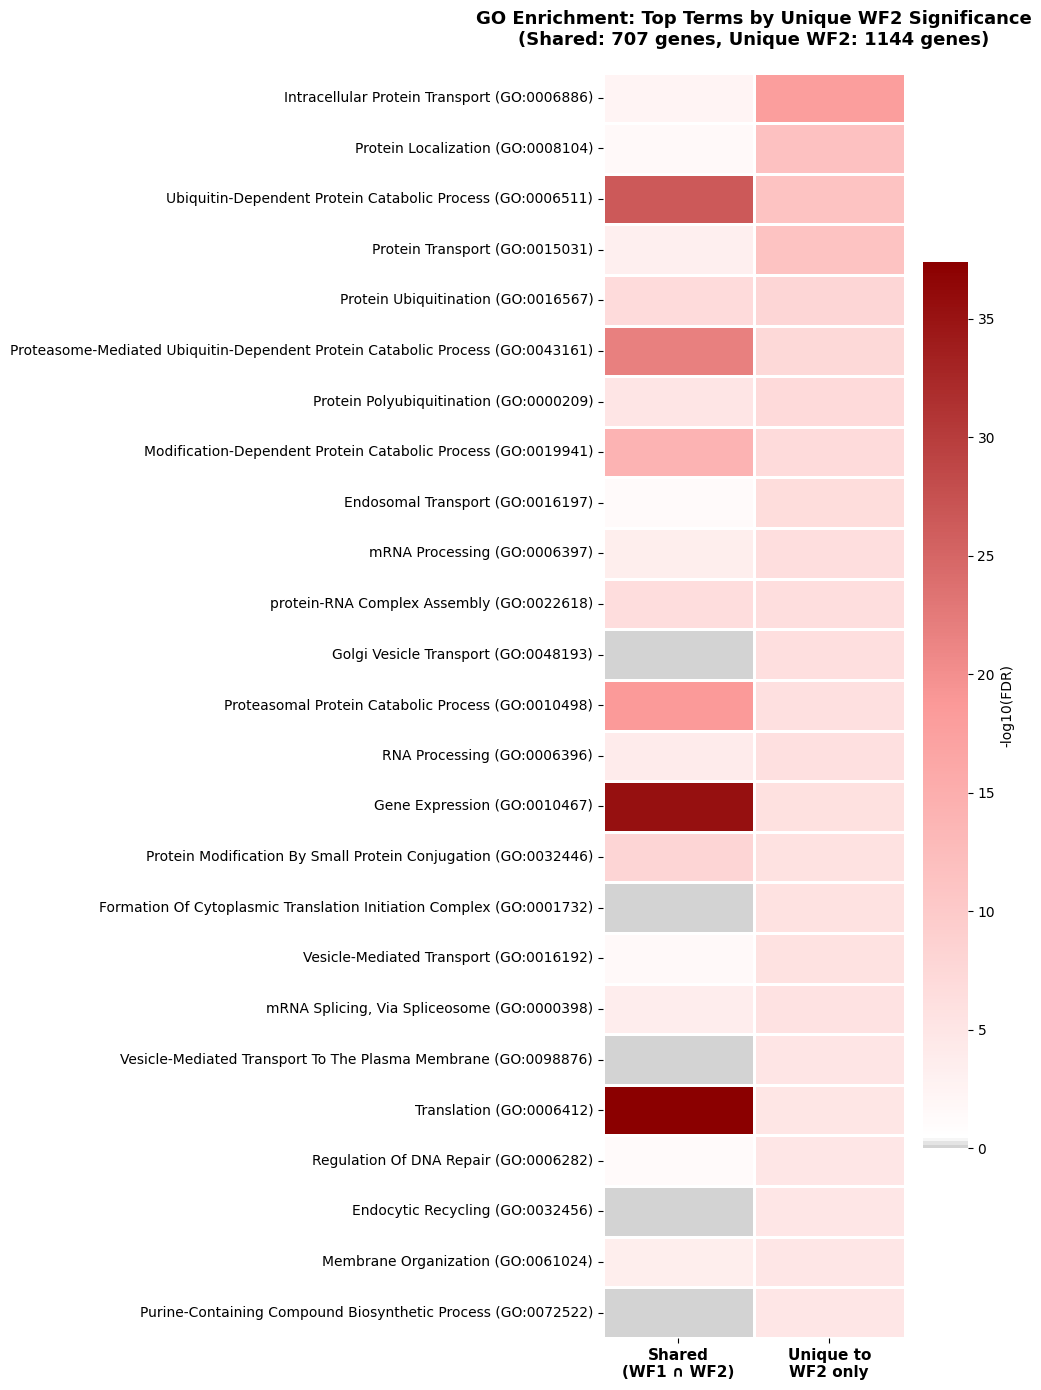


CATEGORIZING ALL GO TERMS

Terms significant ONLY in shared genes: 295
Terms significant ONLY in unique WF2 genes: 171
Terms significant in BOTH: 91

Saved 295 exclusive shared terms to: GO_exclusive_shared.csv
Saved 171 exclusive unique WF2 terms to: GO_exclusive_unique_WF2.csv
Saved 91 terms significant in both to: GO_significant_in_both.csv
Saved complete comparison (557 terms) to: GO_shared_vs_unique_complete.csv


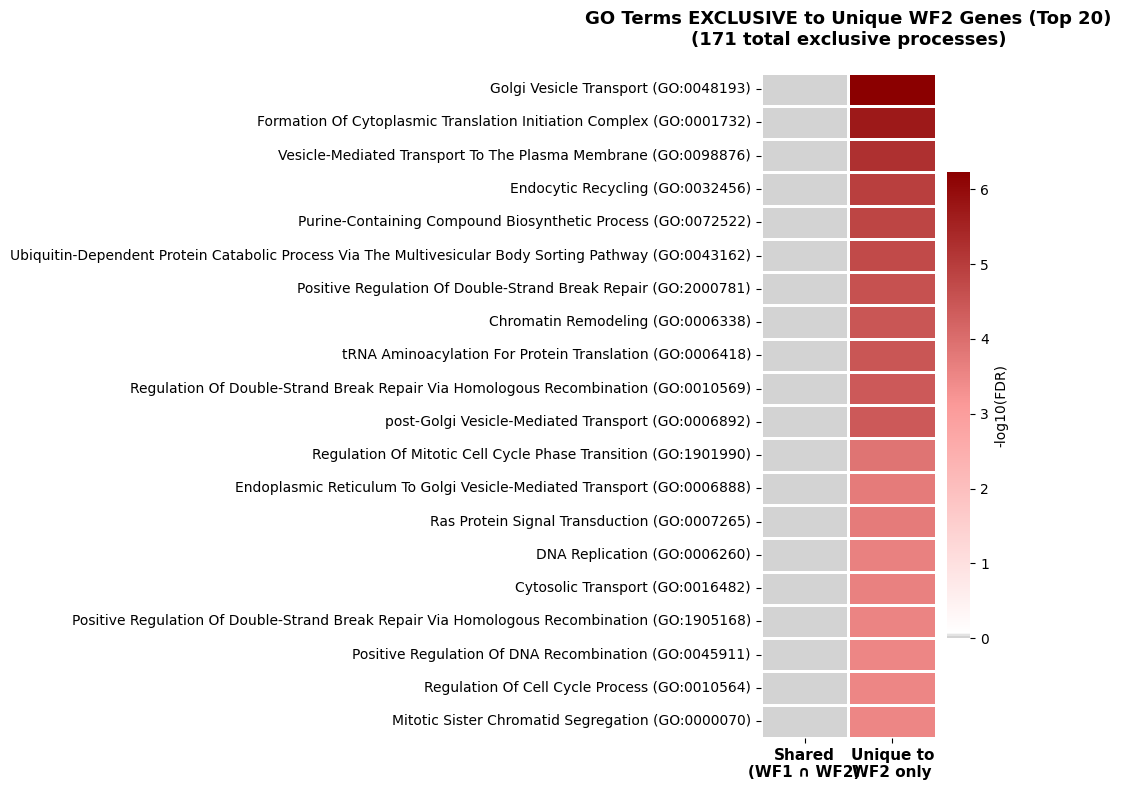


TOP 20 GO TERMS EXCLUSIVE TO UNIQUE WF2 GENES (showing 20 of 171 total)
GO Term                                                                Unique WF2 FDR      
----------------------------------------------------------------------------------------------------
Golgi Vesicle Transport (GO:0048193)                                   5.91e-07
Formation Of Cytoplasmic Translation Initiation Complex (GO:00017...   2.01e-06
Vesicle-Mediated Transport To The Plasma Membrane (GO:0098876)         5.68e-06
Endocytic Recycling (GO:0032456)                                       1.14e-05
Purine-Containing Compound Biosynthetic Process (GO:0072522)           1.50e-05
Ubiquitin-Dependent Protein Catabolic Process Via The Multivesicu...   1.82e-05
Positive Regulation Of Double-Strand Break Repair (GO:2000781)         2.63e-05
Chromatin Remodeling (GO:0006338)                                      3.25e-05
tRNA Aminoacylation For Protein Translation (GO:0006418)               3.25e-05
Regulation Of 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gseapy as gp
# Load your two tables
df1 =df_insol
df2 = df_spec
# Get intensity columns (excluding metadata columns)
metadata_cols = ['UPD_seq', 'Protein_group', 'Gene_group', 'PTM_Collapse_key']
intensity_cols1 = [col for col in df1.columns if col not in metadata_cols]
intensity_cols2 = [col for col in df2.columns if col not in metadata_cols]
# Calculate mean intensities and filter for detected proteins
df1['mean_intensity'] = df1[intensity_cols1].mean(axis=1, skipna=True)
df2['mean_intensity'] = df2[intensity_cols2].mean(axis=1, skipna=True)
# Get genes with detectable signal
genes_wf1 = set(df1[df1['mean_intensity'] > 0]['Gene_group'].unique())
genes_wf2 = set(df2[df2['mean_intensity'] > 0]['Gene_group'].unique())
# Get shared and unique genes
genes_shared = list(genes_wf1 & genes_wf2)  # Overlap
genes_unique_wf2 = list(genes_wf2 - genes_wf1)  # Only in WF2
print(f"\nShared between WF1 & WF2: {len(genes_shared)}")
print(f"Unique to Workflow 2: {len(genes_unique_wf2)}")
print(f"Total in WF2: {len(genes_wf2)}")
# Perform GO enrichment for both gene sets
print("\nPerforming GO enrichment...")
enr_shared = gp.enrichr(gene_list=genes_shared,
                        gene_sets='GO_Biological_Process_2023',
                        organism='human', outdir=None)
enr_unique = gp.enrichr(gene_list=genes_unique_wf2,
                        gene_sets='GO_Biological_Process_2023',
                        organism='human', outdir=None)
# Get significant results (FDR < 0.05)
results_shared = enr_shared.results[enr_shared.results['Adjusted P-value'] < 0.05].copy()
results_unique = enr_unique.results[enr_unique.results['Adjusted P-value'] < 0.05].copy()
print(f"\nSignificant GO terms (shared genes): {len(results_shared)}")
print(f"Significant GO terms (unique genes): {len(results_unique)}")
# Create dictionaries for lookup
fdr_shared = dict(zip(results_shared['Term'], results_shared['Adjusted P-value']))
fdr_unique = dict(zip(results_unique['Term'], results_unique['Adjusted P-value']))
# Get union of significant terms
all_terms = set(results_shared['Term']) | set(results_unique['Term'])
# Create comparison dataframe
comparison_data = []
for term in all_terms:
    fdr_s = fdr_shared.get(term, 1.0)
    fdr_u = fdr_unique.get(term, 1.0)
    # At least one must be significant
    if fdr_s < 0.05 or fdr_u < 0.05:
        comparison_data.append({
            'Term': term,
            'Shared_FDR': fdr_s,
            'Unique_FDR': fdr_u
        })
comparison_df = pd.DataFrame(comparison_data)
# Sort by Unique_FDR (best FDR for unique WF2 genes first)
comparison_df = comparison_df.sort_values('Unique_FDR', ascending=True)
# Take top 25 terms for visualization
top_terms = comparison_df.head(25)
# ============================================================================
# PLOT 1: Main comparison (all top terms by Unique_FDR)
# ============================================================================
fig, ax = plt.subplots(figsize=(10, 14))
# Prepare data: -log10(FDR), set to 0 where not significant
plot_data = np.column_stack([
    np.where(top_terms['Shared_FDR'] < 0.05,
             -np.log10(top_terms['Shared_FDR']), 0),
    np.where(top_terms['Unique_FDR'] < 0.05,
             -np.log10(top_terms['Unique_FDR']), 0)
])
# Create custom colormap: grey for non-significant, then white to red
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, '#D3D3D3'),      # grey at 0 (not significant)
          (0.01, '#FFFFFF'),    # white just above 0
          (0.5, '#FB9A99'),     # light red
          (1, '#8B0000')]        # dark red at max
cmap = LinearSegmentedColormap.from_list('custom', colors, N=256)
# Create heatmap without annotations
sns.heatmap(
    plot_data,
    yticklabels=top_terms['Term'].values,
    xticklabels=['Shared\n(WF1 ∩ WF2)', 'Unique to\nWF2 only'],
    cmap=cmap,
    cbar_kws={'label': '-log10(FDR)', 'shrink': 0.7},
    ax=ax,
    linewidths=1,
    linecolor='white',
    vmin=0,
    square=False,
    annot=False
)
# Improve x-axis label formatting
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=11, fontweight='bold')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
ax.set_title(f'GO Enrichment: Top Terms by Unique WF2 Significance\n' +
             f'(Shared: {len(genes_shared)} genes, Unique WF2: {len(genes_unique_wf2)} genes)',
             fontweight='bold', fontsize=13, pad=20)
ax.set_xlabel('')
ax.set_ylabel('')
plt.tight_layout()
plt.savefig('GO_shared_vs_unique_WF2_heatmap.pdf', dpi=300, bbox_inches='tight')
plt.show()
# ============================================================================
# Categorize ALL terms
# ============================================================================
# Terms unique to the shared gene set
shared_only = comparison_df[
    (comparison_df['Shared_FDR'] < 0.05) &
    (comparison_df['Unique_FDR'] >= 0.05)
].copy()
# Terms unique to the unique gene set (significant ONLY in unique WF2)
unique_only = comparison_df[
    (comparison_df['Shared_FDR'] >= 0.05) &
    (comparison_df['Unique_FDR'] < 0.05)
].copy()
# Terms significant in both
both_sig = comparison_df[
    (comparison_df['Shared_FDR'] < 0.05) &
    (comparison_df['Unique_FDR'] < 0.05)
].copy()
print(f"\n" + "="*100)
print("CATEGORIZING ALL GO TERMS")
print("="*100)
print(f"\nTerms significant ONLY in shared genes: {len(shared_only)}")
print(f"Terms significant ONLY in unique WF2 genes: {len(unique_only)}")
print(f"Terms significant in BOTH: {len(both_sig)}")
# ============================================================================
# Save ALL terms for each category to CSV
# ============================================================================
# Save exclusive to shared
if len(shared_only) > 0:
    shared_only_sorted = shared_only.sort_values('Shared_FDR')
    shared_only_sorted[['Term', 'Shared_FDR']].to_csv('GO_exclusive_shared.csv', index=False)
    print(f"\nSaved {len(shared_only)} exclusive shared terms to: GO_exclusive_shared.csv")
# Save exclusive to unique WF2
if len(unique_only) > 0:
    unique_only_sorted = unique_only.sort_values('Unique_FDR')
    unique_only_sorted[['Term', 'Unique_FDR']].to_csv('GO_exclusive_unique_WF2.csv', index=False)
    print(f"Saved {len(unique_only)} exclusive unique WF2 terms to: GO_exclusive_unique_WF2.csv")
# Save terms significant in both
if len(both_sig) > 0:
    # Add FDR ratio column
    both_sig['FDR_ratio'] = both_sig['Shared_FDR'] / both_sig['Unique_FDR']
    both_sig_sorted = both_sig.sort_values('Unique_FDR')
    both_sig_sorted[['Term', 'Shared_FDR', 'Unique_FDR', 'FDR_ratio']].to_csv('GO_significant_in_both.csv', index=False)
    print(f"Saved {len(both_sig)} terms significant in both to: GO_significant_in_both.csv")
# Save complete comparison table
comparison_df.to_csv('GO_shared_vs_unique_complete.csv', index=False)
print(f"Saved complete comparison ({len(comparison_df)} terms) to: GO_shared_vs_unique_complete.csv")
# ============================================================================
# PLOT 2: GO terms EXCLUSIVE to unique WF2 genes
# ============================================================================
if len(unique_only) > 0:
    # Take top 20 for visualization
    n_plot = min(20, len(unique_only))
    exclusive_plot = unique_only_sorted.head(n_plot)
    fig, ax = plt.subplots(figsize=(10, max(8, n_plot * 0.4)))
    # Prepare data: -log10(FDR)
    plot_data_exclusive = np.column_stack([
        np.zeros(len(exclusive_plot)),  # Shared column = 0 (not significant)
        -np.log10(exclusive_plot['Unique_FDR'])  # Unique column
    ])
    # Create heatmap
    sns.heatmap(
        plot_data_exclusive,
        yticklabels=exclusive_plot['Term'].values,
        xticklabels=['Shared\n(WF1 ∩ WF2)', 'Unique to\nWF2 only'],
        cmap=cmap,
        cbar_kws={'label': '-log10(FDR)', 'shrink': 0.7},
        ax=ax,
        linewidths=1,
        linecolor='white',
        vmin=0,
        square=False,
        annot=False
    )
    # Improve formatting
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center', fontsize=11, fontweight='bold')
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)
    ax.set_title(f'GO Terms EXCLUSIVE to Unique WF2 Genes (Top {n_plot})\n' +
                 f'({len(unique_only)} total exclusive processes)',
                 fontweight='bold', fontsize=13, pad=20)
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.tight_layout()
    plt.savefig('GO_exclusive_unique_WF2_heatmap.pdf', dpi=300, bbox_inches='tight')
    plt.show()
    # Print top 20 exclusive terms
    print("\n" + "="*100)
    print(f"TOP 20 GO TERMS EXCLUSIVE TO UNIQUE WF2 GENES (showing {n_plot} of {len(unique_only)} total)")
    print("="*100)
    print(f"{'GO Term':<70} {'Unique WF2 FDR':<20}")
    print("-"*100)
    for idx, row in exclusive_plot.iterrows():
        term = row['Term'][:65] + '...' if len(row['Term']) > 65 else row['Term']
        print(f"{term:<70} {row['Unique_FDR']:.2e}")
    print(f"\n*** ALL {len(unique_only)} exclusive terms saved to GO_exclusive_unique_WF2.csv ***")
else:
    print("\nNo GO terms are exclusive to unique WF2 genes")
# ============================================================================
# Print summary with top examples
# ============================================================================
print("\n" + "="*100)
print("SUMMARY OF KEY FINDINGS")
print("="*100)
if len(unique_only) > 0:
    print("\n" + "-"*100)
    print(f"TOP 10 PROCESSES DRIVEN SPECIFICALLY BY UNIQUE WF2 GENES (of {len(unique_only)} total):")
    print("-"*100)
    for idx, row in unique_only_sorted.head(10).iterrows():
        print(f"  • {row['Term']}")
        print(f"    Unique WF2 FDR: {row['Unique_FDR']:.2e}\n")
if len(both_sig) > 0:
    # Among terms significant in both, find those much more significant in unique
    both_sig_sorted_ratio = both_sig.sort_values('FDR_ratio', ascending=False)
    print("\n" + "-"*100)
    print(f"TOP 10 PROCESSES MOST ENRICHED IN UNIQUE WF2 (of {len(both_sig)} shared terms):")
    print("-"*100)
    for idx, row in both_sig_sorted_ratio.head(10).iterrows():
        print(f"  • {row['Term']}")
        print(f"    Unique WF2 FDR: {row['Unique_FDR']:.2e}, Shared FDR: {row['Shared_FDR']:.2e}")
        print(f"    {row['FDR_ratio']:.1f}x more significant in unique\n")
if len(shared_only) > 0:
    shared_only_sorted_fdr = shared_only.sort_values('Shared_FDR')
    print("\n" + "-"*100)
    print(f"TOP 10 PROCESSES EXCLUSIVE TO SHARED GENES (of {len(shared_only)} total):")
    print("-"*100)
    for idx, row in shared_only_sorted_fdr.head(10).iterrows():
        print(f"  • {row['Term']}")
        print(f"    Shared FDR: {row['Shared_FDR']:.2e}\n")
print("\n" + "="*100)
print("FILES SAVED:")
print("="*100)
print(f"  1. GO_exclusive_shared.csv - {len(shared_only)} terms")
print(f"  2. GO_exclusive_unique_WF2.csv - {len(unique_only)} terms")
print(f"  3. GO_significant_in_both.csv - {len(both_sig)} terms")
print(f"  4. GO_shared_vs_unique_complete.csv - {len(comparison_df)} terms (all)")
print("="*100)

In [17]:
df = pd.read_csv(r'Z:\SPEC\submission\raw\figure4\GO_shared_vs_unique_complete_KGG_SPEC.csv')

In [11]:
go_ids_set4 = [
    'GO:0006886',  # Intracellular Protein Transport
    'GO:0048193',  # Golgi Vesicle Transport
    'GO:0001732',  # Formation Of Cytoplasmic Translation Initiation Complex
    'GO:0000070',  # Mitotic Sister Chromatid Segregation
    'GO:1901990',   # Regulation Of Mitotic Cell Cycle Phase Transition
    'GO:0000070',  # Mitotic Sister Chromatid Segregation
]

In [12]:
nums_shared = []
nums_unique = []
terms = []
for el in go_ids_set4:
    nums_shared.append(df[df['Term'].str.contains(el)]['Shared_FDR'].values[0])
    nums_unique.append(df[df['Term'].str.contains(el)]['Unique_FDR'].values[0])
nums_all = [nums_shared, nums_unique]

NameError: name 'df' is not defined

In [21]:

data = [[np.float64(9.94e-06), np.float64(1.0), np.float64(1.0), 
         np.float64(0.041634998), np.float64(1.0), np.float64(0.041634998)],
        [np.float64(8.16e-13), np.float64(1.62e-08), np.float64(1.59e-09), 
         np.float64(9.79e-05), np.float64(0.000149394), np.float64(9.79e-05)]]

terms = ['GO:0006886', 'GO:0048193', 'GO:0001732', 
         'GO:0000070', 'GO:1901990', 'GO:0000070']


data_array = np.array(data)

data_array[data_array == 0] = 1e-300
log_data = -np.log10(data_array)

fig = go.Figure(data=go.Heatmap(
    z=log_data.T,  
    x=['Shared_FDR', 'Unique_FDR'], 
    y=terms, 
    colorscale='Reds', 
    colorbar=dict(title='-log10(FDR)'),
    text=data_array.T, 
    texttemplate='%{text:.2e}',  
    hovertemplate='<b>%{y}</b><br>%{x}<br>FDR: %{text:.2e}<br>-log10(FDR): %{z:.2f}<extra></extra>'
))


fig.update_layout(
    title='GO Term Enrichment Analysis',
    xaxis_title='Analysis Type',
    yaxis_title='GO Terms',
    width=350,
    height=500,
    font=dict(size=12)
)
fig.show()
#fig.write_image(r'D:\Projects\SPEC\figs_raw\Figure_4h.pdf', width=350, height=500)